In [92]:
# Importing some libraries
import pandas as pd
import numpy as np
import seaborn as sns
!pip install praw
import praw
import requests

In [93]:
# Passing your details
sl_comments = praw.Reddit(client_id='5J_x8kHpdQAt2ZvsO36Gvg',
                     client_secret='LlxYtQRG-dF07mM6SWnbn3YsYK1iZA',
                     user_agent='QMSS_webscrapper') # Put in your credentials to access the api

url = "https://www.reddit.com/r/politics/comments/17ubuo4/joe_bidens_economy_is_honestly_pretty_amazing_how/"

In [94]:
url = "https://www.reddit.com/r/politics/comments/17ubuo4/joe_bidens_economy_is_honestly_pretty_amazing_how/" # url object created

submission = sl_comments.submission(url=url) # post object created

In [95]:
from praw.models import MoreComments			# Importing more comments module from praw package

post_comments = []												# creating a list to hold comments

for comment in submission.comments:				# Initiate a for loop that will iterate through the comment forest
	if type(comment) == MoreComments:				# if statement helps code iterate through the “load more comments” and “continue this thread”.
		continue                              # as long as there are comments continue

	post_comments.append(comment.body)			# appending the comment's body to the comment list

# creating a dataframe
comments_df = pd.DataFrame(post_comments, columns=['comment'])		# Converting the 'post_comments' list to dataframe and naming the column.
comments_df # printing out of comments_df to check that the code ran

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



comment
0    \nAs a reminder, this subreddit [is for civil ...
1    As long as food, fuel, and housing prices are ...
2                                            [deleted]
3    I’m a working class American. It’s not better ...
4    As a left leaning guy, they can keep saying ho...
..                                                 ...
128  This is such a classic Reddit post. Grade A le...
129                         This is actual gaslighting
130  Look I like the guy and am voting for him, but...
131  How out of touch are these boomers? I'll never...
132  Great source! not.\n\nSalon is an American pol...

[133 rows x 1 columns]

In [96]:
comments_df.shape # further check to see if the code ran correctly

(133, 1)

In [97]:
# Getting all sub-level comments
post_comments = []  # Create an empty list


submission.comments.replace_more(limit=None) # replace_more gets sub-level comments, limit = None gathers all sub-level comments
for comment in submission.comments.list(): # for that iterates through each comment
 post_comments.append([comment.body, comment.ups, comment.downs, comment.created]) # Append the comment body, and other parameters to the empty list


# Convert the 'post_comments' list to dataframe and naming the column.
comments_df = pd.DataFrame(post_comments, columns=['comment', 'ups', 'downs', 'created']) # creating the dataframe
comments_df # checking to see if the code ran correctly

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

comment    ups  downs  \
0     \nAs a reminder, this subreddit [is for civil ...      1      0   
1     As long as food, fuel, and housing prices are ...  10765      0   
2                                             [deleted]   2585      0   
3     I’m a working class American. It’s not better ...   1493      0   
4     As a left leaning guy, they can keep saying ho...   1622      0   
...                                                 ...    ...    ...   
5245  I stated I wasn't opposed to congress. I merel...      0      0   
5246                     You're so close to getting it.      1      0   
5247  No he absolutely cannot ban FPTP with the stro...      1      0   
5248  No, I get it. You think they all are. I say yo...      1      0   
5249            Bot voting no but many other things yes      1      0   

           created  
0     1.699886e+09  
1     1.699887e+09  
2     1.699887e+09  
3     1.699887e+09  
4     1.699886e+09  
...            ...  
5245  1.699908e+09  
5246  1.700108e+09  
5247  1.699914e+09  
5248  1.700109e+09  
5249  1.699915e+09  

[5250 rows x 4 columns]

In [98]:
from datetime import datetime

comments_df['date_time'] = pd.to_datetime(comments_df['created'],  unit='s')    # this passes all the time details, setting the unit as seconds away from the origin
comments_df['date'] = comments_df['date_time'].dt.strftime('%Y-%m-%d') # formatting the date created into a year, month, day format

comments_df.head() # checking to see if date is formatted as it should be.

comment    ups  downs  \
0  \nAs a reminder, this subreddit [is for civil ...      1      0   
1  As long as food, fuel, and housing prices are ...  10765      0   
2                                          [deleted]   2585      0   
3  I’m a working class American. It’s not better ...   1493      0   
4  As a left leaning guy, they can keep saying ho...   1622      0   

        created           date_time        date  
0  1.699886e+09 2023-11-13 14:30:01  2023-11-13  
1  1.699887e+09 2023-11-13 14:52:46  2023-11-13  
2  1.699887e+09 2023-11-13 14:56:13  2023-11-13  
3  1.699887e+09 2023-11-13 14:44:38  2023-11-13  
4  1.699886e+09 2023-11-13 14:31:50  2023-11-13

In [99]:
# Counting characters in the 'text_column'
comments_df['character_count'] = comments_df['comment'].apply(lambda x: len(x)) # using a lambda function to count the number of characters in each comment
comments_df # inspecting the character_count variable

comment    ups  downs  \
0     \nAs a reminder, this subreddit [is for civil ...      1      0   
1     As long as food, fuel, and housing prices are ...  10765      0   
2                                             [deleted]   2585      0   
3     I’m a working class American. It’s not better ...   1493      0   
4     As a left leaning guy, they can keep saying ho...   1622      0   
...                                                 ...    ...    ...   
5245  I stated I wasn't opposed to congress. I merel...      0      0   
5246                     You're so close to getting it.      1      0   
5247  No he absolutely cannot ban FPTP with the stro...      1      0   
5248  No, I get it. You think they all are. I say yo...      1      0   
5249            Bot voting no but many other things yes      1      0   

           created           date_time        date  character_count  
0     1.699886e+09 2023-11-13 14:30:01  2023-11-13              872  
1     1.699887e+09 2023-11-13 14:52:46  2023-11-13              286  
2     1.699887e+09 2023-11-13 14:56:13  2023-11-13                9  
3     1.699887e+09 2023-11-13 14:44:38  2023-11-13              142  
4     1.699886e+09 2023-11-13 14:31:50  2023-11-13              152  
...            ...                 ...         ...              ...  
5245  1.699908e+09 2023-11-13 20:44:07  2023-11-13              122  
5246  1.700108e+09 2023-11-16 04:18:35  2023-11-16               30  
5247  1.699914e+09 2023-11-13 22:25:13  2023-11-13              207  
5248  1.700109e+09 2023-11-16 04:21:49  2023-11-16               89  
5249  1.699915e+09 2023-11-13 22:34:29  2023-11-13               39  

[5250 rows x 7 columns]

In [100]:
# Counting words in the 'text_column'
comments_df['word_count'] = comments_df['comment'].apply(lambda x: len(x.split())) # using a lambda function to count the number of words in each comment
comments_df # inspecting the word_count variable

comment    ups  downs  \
0     \nAs a reminder, this subreddit [is for civil ...      1      0   
1     As long as food, fuel, and housing prices are ...  10765      0   
2                                             [deleted]   2585      0   
3     I’m a working class American. It’s not better ...   1493      0   
4     As a left leaning guy, they can keep saying ho...   1622      0   
...                                                 ...    ...    ...   
5245  I stated I wasn't opposed to congress. I merel...      0      0   
5246                     You're so close to getting it.      1      0   
5247  No he absolutely cannot ban FPTP with the stro...      1      0   
5248  No, I get it. You think they all are. I say yo...      1      0   
5249            Bot voting no but many other things yes      1      0   

           created           date_time        date  character_count  \
0     1.699886e+09 2023-11-13 14:30:01  2023-11-13              872   
1     1.699887e+09 2023-11-13 14:52:46  2023-11-13              286   
2     1.699887e+09 2023-11-13 14:56:13  2023-11-13                9   
3     1.699887e+09 2023-11-13 14:44:38  2023-11-13              142   
4     1.699886e+09 2023-11-13 14:31:50  2023-11-13              152   
...            ...                 ...         ...              ...   
5245  1.699908e+09 2023-11-13 20:44:07  2023-11-13              122   
5246  1.700108e+09 2023-11-16 04:18:35  2023-11-16               30   
5247  1.699914e+09 2023-11-13 22:25:13  2023-11-13              207   
5248  1.700109e+09 2023-11-16 04:21:49  2023-11-16               89   
5249  1.699915e+09 2023-11-13 22:34:29  2023-11-13               39   

      word_count  
0            117  
1             50  
2              1  
3             28  
4             29  
...          ...  
5245          26  
5246           6  
5247          41  
5248          19  
5249           8  

[5250 rows x 8 columns]

In [101]:
# # Remove the duplicate and save data to csv file
comments_df1 = comments_df # creating a copy of the dataframe, using the copied version going forward
comments_df1.drop_duplicates(subset='comment', keep='last', inplace=True) # dropping duplicate comments, will keep the duplicate that appears last
# comments_df1.to_csv('project3_comments.csv', index=True, header=True) # converting the df to a csv file
# comments_df1.shape #view dimension of data to see how many data points remain after cleaning

(5072, 8)

In [102]:
reddit_data = pd.read_csv('project3_comments.csv') # reading in the csv file
reddit_data.head() # doing head to confirm the csv file was read in correctly

Unnamed: 0                                            comment    ups  \
0           0  \nAs a reminder, this subreddit [is for civil ...      1   
1           1  As long as food, fuel, and housing prices are ...  10767   
2           3  I’m a working class American. It’s not better ...   1490   
3           4  As a left leaning guy, they can keep saying ho...   1616   
4           5  IDGAF about the Economy. I care about the cost...    389   

   downs       created            date_time        date  character_count  \
0      0  1.699886e+09  2023-11-13 14:30:01  2023-11-13              872   
1      0  1.699887e+09  2023-11-13 14:52:46  2023-11-13              286   
2      0  1.699887e+09  2023-11-13 14:44:38  2023-11-13              142   
3      0  1.699886e+09  2023-11-13 14:31:50  2023-11-13              152   
4      0  1.699889e+09  2023-11-13 15:25:14  2023-11-13              135   

   word_count  
0         117  
1          50  
2          28  
3          29  
4          25

In [103]:

reddit_data.columns # viewing the columns in reddit_data

Index(['Unnamed: 0', 'comment', 'ups', 'downs', 'created', 'date_time', 'date',
       'character_count', 'word_count'],
      dtype='object')

In [104]:
reddit_data1 = reddit_data.drop(columns = ['Unnamed: 0'], axis = 1) # creating copy of reddit_data dropping the unneccesary unnamed column, using copy going forward
reddit_data1.head() # checking to see if the column was successfully dropped

comment    ups  downs  \
0  \nAs a reminder, this subreddit [is for civil ...      1      0   
1  As long as food, fuel, and housing prices are ...  10767      0   
2  I’m a working class American. It’s not better ...   1490      0   
3  As a left leaning guy, they can keep saying ho...   1616      0   
4  IDGAF about the Economy. I care about the cost...    389      0   

        created            date_time        date  character_count  word_count  
0  1.699886e+09  2023-11-13 14:30:01  2023-11-13              872         117  
1  1.699887e+09  2023-11-13 14:52:46  2023-11-13              286          50  
2  1.699887e+09  2023-11-13 14:44:38  2023-11-13              142          28  
3  1.699886e+09  2023-11-13 14:31:50  2023-11-13              152          29  
4  1.699889e+09  2023-11-13 15:25:14  2023-11-13              135          25

In [105]:


import re                                                                       # Import  regular expression

import nltk                                                                     # Import Imports the Natural Language Toolkit library
nltk.download('stopwords')                                                      # Downloads a set of commonly used stopwords
from nltk.corpus import stopwords                                               # Imports the stopwords from the NLTK corpus
STOPWORDS = set(stopwords.words('english'))                                     # Creates a set of English stopwords from NLTK's corpus

#Reddit text cleaning
def reddit_clean (redd):                                                        # Create a function called reddit_clean
    redd = str(redd).lower()                                                    # Converts the text to lowercase
    redd = re.sub("'", "", redd)                                                # Removes single quotes
    redd = re.sub("@[A-Za-z0-9_]+","", redd)                                    # Removes patterns that start with '@'
    redd = re.sub("#[A-Za-z0-9_]+","", redd)                                    # Removes patterns that start with '#'
    redd = re.sub(r"www.\S+", "", redd)                                         # Removes URLs that start with 'www.'
    redd = re.sub(r"http\S+", "", redd)                                         # Removes URLs.
    redd = re.sub('[()!?]', ' ', redd)                                          # Replaces parentheses, exclamation marks, and question marks with spaces
    redd = re.sub('\[.*?\]',' ', redd)                                          # Removes text within square brackets
    redd = re.sub("[^a-z0-9]"," ", redd)                                        # Replaces non-alphanumeric characters with spaces.
    redd = re.sub(r"\b\w{1,3}\b"," ", redd)                                     # Removes words with less than 4 characters.
    redd = redd.split()                                                         # Splits the text into a list of words
    stopwords = STOPWORDS                                                       # Assigns the set of stopwords to a variable called stopwords
    redd = [w for w in redd if not w in stopwords]                              # Removes stopwords from the list of words
    redd = " ".join(word for word in redd)                                      # Joins the remaining words back into a string
    return redd                                                                 # Returns the cleaned text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [106]:
reddit_data1['comment'] = reddit_data1['comment'].apply(reddit_clean)           # applying the reddit_clean function to clean the 'comment' column of the DataFrame reddit_data1
reddit_data1.head() # checking to see if the function was correctly applied

comment    ups  downs  \
0  reminder subreddit politics wiki index general...      1      0   
1  long food fuel housing prices high especially ...  10767      0   
2  working class american better anyone know much...   1490      0   
3  left leaning keep saying great economy prices ...   1616      0   
4  idgaf economy care cost life groceries housing...    389      0   

        created            date_time        date  character_count  word_count  
0  1.699886e+09  2023-11-13 14:30:01  2023-11-13              872         117  
1  1.699887e+09  2023-11-13 14:52:46  2023-11-13              286          50  
2  1.699887e+09  2023-11-13 14:44:38  2023-11-13              142          28  
3  1.699886e+09  2023-11-13 14:31:50  2023-11-13              152          29  
4  1.699889e+09  2023-11-13 15:25:14  2023-11-13              135          25

In [107]:
# Tokenize the comments splitting the string into a list with individual words
tokenized_reddit_post = reddit_data1['comment'].apply(lambda x: x.split()) # splitting the comment into individual words
print(tokenized_reddit_post) # checking to make sure that list is to my liking

0       [reminder, subreddit, politics, wiki, index, g...
1       [long, food, fuel, housing, prices, high, espe...
2       [working, class, american, better, anyone, kno...
3       [left, leaning, keep, saying, great, economy, ...
4       [idgaf, economy, care, cost, life, groceries, ...
                              ...                        
5068    [stated, wasnt, opposed, congress, merely, sta...
5069                              [youre, close, getting]
5070    [absolutely, cannot, fptp, stroke, congress, e...
5071                    [think, youre, full, established]
5072                               [voting, many, things]
Name: comment, Length: 5073, dtype: object


In [108]:
from nltk.stem import PorterStemmer # importing PorterStemmer

stemmer = PorterStemmer() # giving the PorterStemmer an object
tokenized_reddit_post = tokenized_reddit_post.apply(lambda x: [stemmer.stem(i) for i in x]) # using a lambda to apply the stemmer to each word in the comment
reddit_data1['tokenized']= tokenized_reddit_post # setting the tokenized column equal to its own variable
reddit_data1.head() # checking to see if code executed correctly

comment    ups  downs  \
0  reminder subreddit politics wiki index general...      1      0   
1  long food fuel housing prices high especially ...  10767      0   
2  working class american better anyone know much...   1490      0   
3  left leaning keep saying great economy prices ...   1616      0   
4  idgaf economy care cost life groceries housing...    389      0   

        created            date_time        date  character_count  word_count  \
0  1.699886e+09  2023-11-13 14:30:01  2023-11-13              872         117   
1  1.699887e+09  2023-11-13 14:52:46  2023-11-13              286          50   
2  1.699887e+09  2023-11-13 14:44:38  2023-11-13              142          28   
3  1.699886e+09  2023-11-13 14:31:50  2023-11-13              152          29   
4  1.699889e+09  2023-11-13 15:25:14  2023-11-13              135          25   

                                           tokenized  
0  [remind, subreddit, polit, wiki, index, gener,...  
1  [long, food, fuel, hous, price, high, especi, ...  
2  [work, class, american, better, anyon, know, m...  
3  [left, lean, keep, say, great, economi, price,...  
4  [idgaf, economi, care, cost, life, groceri, ho...

Whole Comment Body Word Cloud

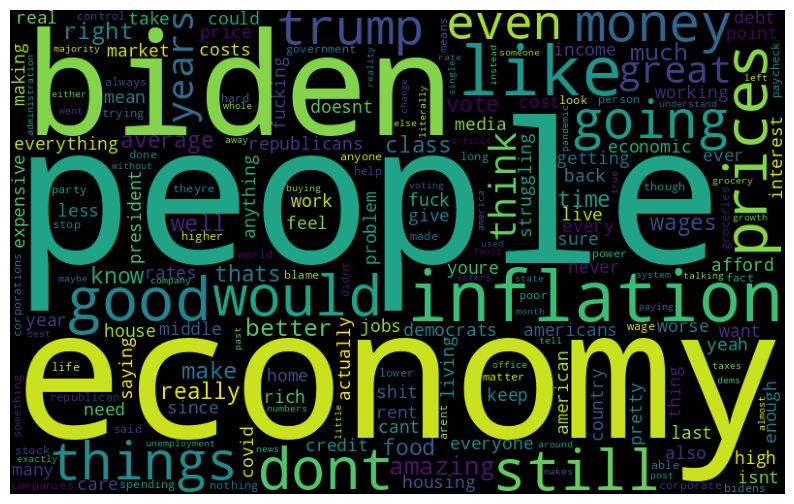

In [109]:
import matplotlib.pyplot as plt # importing matplotlib to make visualizations
from wordcloud import WordCloud       # importing word cloud
import collections                    # importing Collections module to count the frequency of words

all_words = ' '.join([text for text in reddit_data1['comment']])      # .join concatenates all the text data into a single string
count_word = collections.Counter(all_words.split())                   # Tokenize the all_words and count their frequencies

wordcloud = WordCloud(width=800, height=500)                          # width and height of the wordcloud in pixel
wordcloud.generate_from_frequencies(count_word)                       # generate the word cloud based on the word frequencies
plt.figure(figsize=(10, 7))                                           # size in inches
plt.imshow(wordcloud)                                                 # show the wordcloud
plt.axis("off")                                                       # dont show axis
plt.show()                                                            # plotting the wordcloud

In [110]:
import itertools # itertools helps make iterating through data more efficient
import collections # helps to count the words
#count the most words shown up in all_words
count_word = collections.Counter(all_words.split()) # re-initializing counter
count_word.most_common(25) # getting the 25 most common words

[('people', 1860),
 ('economy', 1708),
 ('biden', 953),
 ('inflation', 845),
 ('like', 828),
 ('good', 615),
 ('prices', 594),
 ('dont', 560),
 ('still', 534),
 ('would', 530),
 ('things', 515),
 ('going', 515),
 ('money', 508),
 ('trump', 507),
 ('even', 497),
 ('great', 477),
 ('years', 472),
 ('think', 457),
 ('amazing', 436),
 ('much', 416),
 ('better', 414),
 ('right', 397),
 ('well', 396),
 ('make', 386),
 ('know', 363)]

Start of TextBlob

In [111]:
from textblob import TextBlob     # importing TextBlob for sentiment analysis



def get_polarity(text): # defining function
    analysis = TextBlob(text) # setting variable to hold text
    return analysis.sentiment.polarity # return the polarity of the comment text

def get_subjectivity(text): # defining function
    analysis = TextBlob(text) # setting variable to hold text
    return analysis.sentiment.subjectivity # return the subjectivity of the comment text

reddit_data1['polarity'] = reddit_data1['comment'].apply(get_polarity) # calling function
reddit_data1['subjectivity'] = reddit_data1['comment'].apply(get_subjectivity) # calling function
reddit_data1.head() # checking to see if the functions ran correctly

comment    ups  downs  \
0  reminder subreddit politics wiki index general...      1      0   
1  long food fuel housing prices high especially ...  10767      0   
2  working class american better anyone know much...   1490      0   
3  left leaning keep saying great economy prices ...   1616      0   
4  idgaf economy care cost life groceries housing...    389      0   

        created            date_time        date  character_count  word_count  \
0  1.699886e+09  2023-11-13 14:30:01  2023-11-13              872         117   
1  1.699887e+09  2023-11-13 14:52:46  2023-11-13              286          50   
2  1.699887e+09  2023-11-13 14:44:38  2023-11-13              142          28   
3  1.699886e+09  2023-11-13 14:31:50  2023-11-13              152          29   
4  1.699889e+09  2023-11-13 15:25:14  2023-11-13              135          25   

                                           tokenized  polarity  subjectivity  
0  [remind, subreddit, polit, wiki, index, gener,...    -0.010        0.5600  
1  [long, food, fuel, hous, price, high, especi, ...    -0.010        0.5850  
2  [work, class, american, better, anyon, know, m...     0.165        0.3400  
3  [left, lean, keep, say, great, economi, price,...     0.400        0.4625  
4  [idgaf, economi, care, cost, life, groceri, ho...     0.250        0.5000

In [112]:
# Create a function to classify the polarity
def analyze_sentiment(text): # defining function
    sentiment_polarity = get_polarity(text) # getting the polarity of the text
    if sentiment_polarity > 0.05: #  running if statements to create labels for the sentiment
        return 'Positive Sentiment'
    elif sentiment_polarity >= -0.05 and sentiment_polarity <= 0.05 : # Neutral has to two condition hence I used the and operator
        return 'Neutral Sentiment'
    else: # if not positive or neutral return negative
        return 'Negative Sentiment'

In [113]:
reddit_data1['textblob_sentiment'] = reddit_data1['comment'].apply(analyze_sentiment) # applying the function to the comments

In [182]:
# Create a function to classify the subjectivity
def analyze_subjectivity(text): # defining function
    sentiment_subjectivity = get_subjectivity(text) # getting the subjectivity of the text
    if sentiment_subjectivity > 0.55: #  running if statements to create labels for the sentiment
        return 'Subjective'
    elif sentiment_subjectivity >= 0.5 and sentiment_subjectivity <= 0.55 : # Neutral has to two condition hence I used the and operator
        return 'Neutral'
    else: # if not positive or neutral return negative
        return 'Objective'

In [183]:
reddit_data1['textblob_subjectivity'] = reddit_data1['comment'].apply(analyze_subjectivity) # applying the function to the comments

In [185]:
pd.crosstab(reddit_data1["textblob_sentiment"], reddit_data1["textblob_subjectivity"])

textblob_subjectivity  Neutral  Objective  Subjective
textblob_sentiment                                   
Negative Sentiment         110        409         500
Neutral Sentiment           85       1367         190
Positive Sentiment         406       1017         989

In [184]:
reddit_data1.head() # checking to make sure that the function was correctly applied

comment    ups  downs  \
0  reminder subreddit politics wiki index general...      1      0   
1  long food fuel housing prices high especially ...  10767      0   
2  working class american better anyone know much...   1490      0   
3  left leaning keep saying great economy prices ...   1616      0   
4  idgaf economy care cost life groceries housing...    389      0   

        created            date_time       date  character_count  word_count  \
0  1.699886e+09  2023-11-13 14:30:01 2023-11-13              872         117   
1  1.699887e+09  2023-11-13 14:52:46 2023-11-13              286          50   
2  1.699887e+09  2023-11-13 14:44:38 2023-11-13              142          28   
3  1.699886e+09  2023-11-13 14:31:50 2023-11-13              152          29   
4  1.699889e+09  2023-11-13 15:25:14 2023-11-13              135          25   

                                           tokenized  polarity  subjectivity  \
0  [remind, subreddit, polit, wiki, index, gener,...    -0.010        0.5600   
1  [long, food, fuel, hous, price, high, especi, ...    -0.010        0.5850   
2  [work, class, american, better, anyon, know, m...     0.165        0.3400   
3  [left, lean, keep, say, great, economi, price,...     0.400        0.4625   
4  [idgaf, economi, care, cost, life, groceri, ho...     0.250        0.5000   

   textblob_sentiment  compound_score  pos_score  neg_score  \
0   Neutral Sentiment         -0.8846      0.222      0.311   
1   Neutral Sentiment          0.0258      0.050      0.000   
2  Positive Sentiment          0.8658      0.492      0.000   
3  Positive Sentiment          0.8591      0.543      0.000   
4  Positive Sentiment          0.2263      0.221      0.159   

      vader_sentiment textblob_subjectivity  
0  Negative Sentiment            Subjective  
1   Neutral Sentiment            Subjective  
2  Positive Sentiment             Objective  
3  Positive Sentiment             Objective  
4  Positive Sentiment               Neutral

In [115]:
reddit_data1["polarity"].mean() # getting mean of text blob polarity


0.07443157540608521

In [116]:
reddit_data1["polarity"].std() # getting standard deviation of text blob polarity

0.2557693874563261

In [117]:
reddit_data1["subjectivity"].mean() # getting mean of text blob subjectivity

0.42756086373124746

In [118]:
reddit_data1["subjectivity"].std() # getting standard deviation of text blob subjectivity

0.27238904895431515

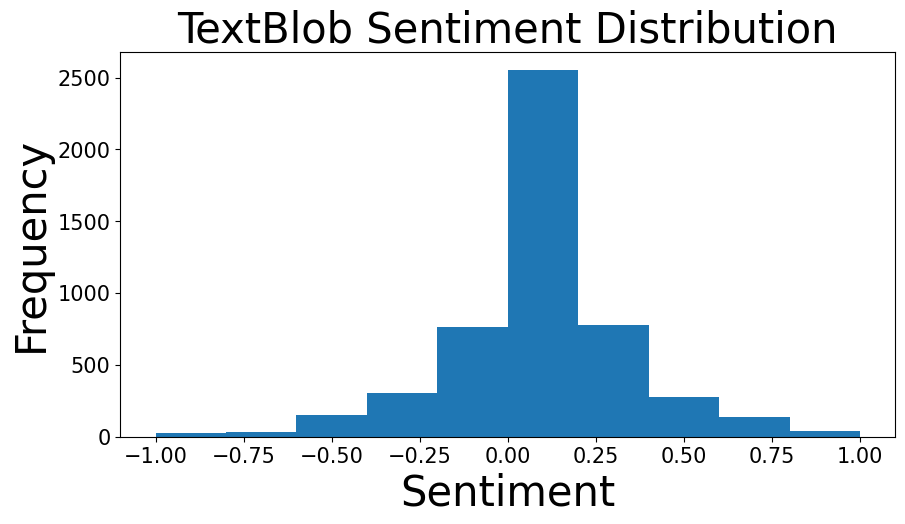

In [119]:
# Bar chart of the sentiment
plt.figure(figsize=(10,5)) # setting the figure size
plt.xlabel('Sentiment', fontsize=30) # setting the x axis label
plt.xticks(fontsize=15) # size of tick marks
plt.ylabel('Frequency', fontsize=30) # setting the y axix label
plt.yticks(fontsize=15) # size of tick marks
plt.hist(reddit_data1['polarity'], bins=10) # setting number of bins in histogram
plt.title('TextBlob Sentiment Distribution', fontsize=30) # setting title
plt.show() # plotting the histogram

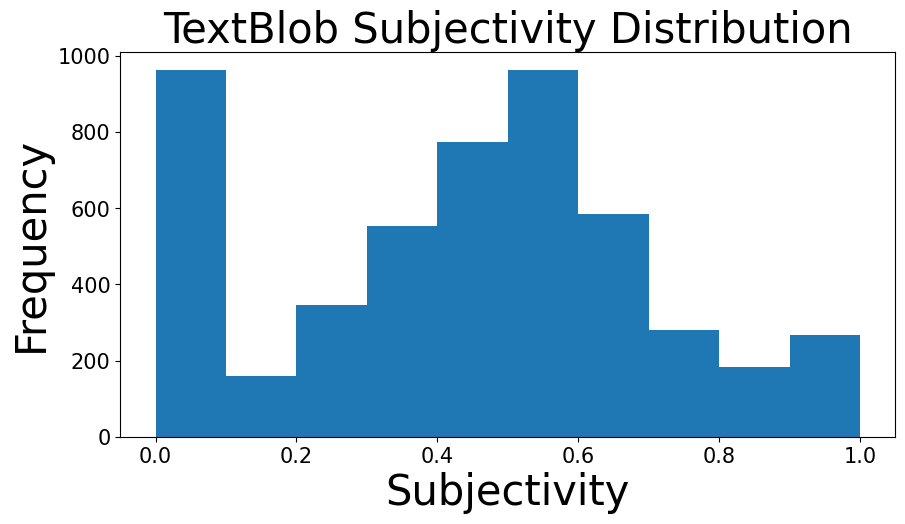

In [120]:
plt.figure(figsize=(10,5))  # setting the figure size
plt.xlabel('Subjectivity', fontsize=30) # setting the x axis label
plt.xticks(fontsize=15) # size of tick marks
plt.ylabel('Frequency', fontsize=30) # setting the y axix label
plt.yticks(fontsize=15) # size of tick marks
plt.hist(reddit_data1['subjectivity'], bins=10) # setting number of bins in histogram
plt.title('TextBlob Subjectivity Distribution', fontsize=30)  # setting title
plt.show() # plotting the histogram

Textblob Positive Visualizations

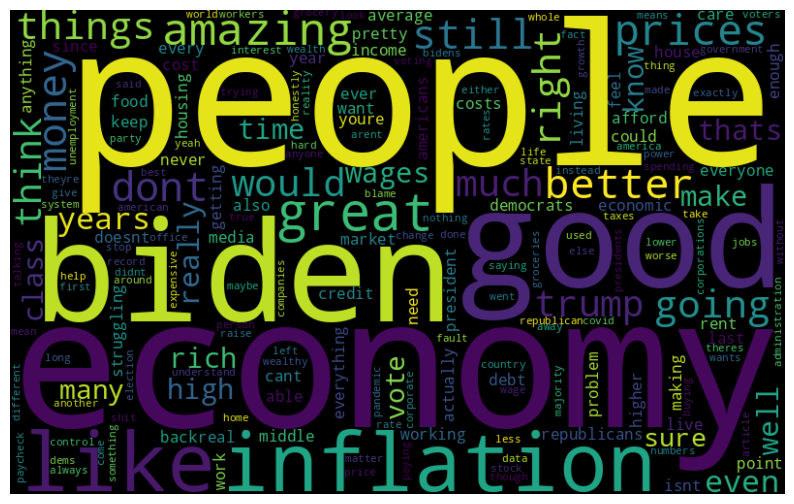

In [121]:

textblob_positive_comments = reddit_data1[reddit_data1['textblob_sentiment'] == 'Positive Sentiment']['comment'] # filtering out only positive sentiment comments
textblob_words_pos = ' '.join([text for text in textblob_positive_comments])  # Concatenates all the text from positive comments into a single string
count_word = collections.Counter(textblob_words_pos.split())  # Tokenize the all_words and count their frequencies

wordcloud = WordCloud(width=800, height=500)  # Create a word cloud object with specified width and height in pixels
wordcloud.generate_from_frequencies(count_word)  # Generate the word cloud from the word frequencies calculated earlier

plt.figure(figsize=(10, 7))  # Set figure size in inches
plt.imshow(wordcloud, interpolation='bilinear')  # Display the word cloud, with bilinear interpolation for rendering edges smoother
plt.axis("off")  # Turn off the axis
plt.show()  # Show the plot

In [122]:
count_word = collections.Counter(textblob_words_pos.split()) # applying the counter to count the frequency of each word
count_word.most_common(20) # getting the most common 20 words
textblob_pos20 = count_word.most_common(20) # setting an object equal to it

textblob_pos20 # print the top 20 words

[('people', 1081),
 ('economy', 1074),
 ('biden', 562),
 ('good', 536),
 ('like', 461),
 ('inflation', 460),
 ('great', 414),
 ('amazing', 380),
 ('prices', 338),
 ('better', 322),
 ('still', 312),
 ('money', 308),
 ('dont', 305),
 ('things', 303),
 ('going', 297),
 ('right', 290),
 ('would', 282),
 ('trump', 277),
 ('much', 276),
 ('think', 272)]

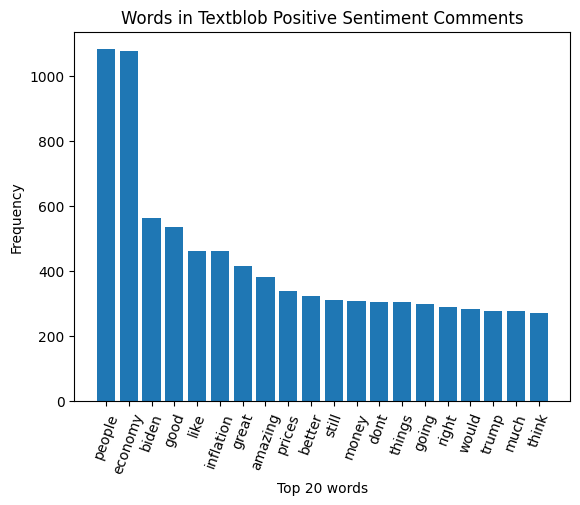

In [123]:
plt.bar(range(20), [val[1] for val in textblob_pos20], align = "center") # sets bars equal to the top 20 words values, and ticks to the top 20 words (next line)
plt.xticks(range(20), [val[0] for val in textblob_pos20])
plt.xticks(rotation=70) # rotating the values
plt.xlabel('Top 20 words') # labeling x-axis
plt.ylabel('Frequency') # labeling y-axis
plt.title('Words in Textblob Positive Sentiment Comments') # titling the barchart
plt.show()

Textblob Neutral Visualizations

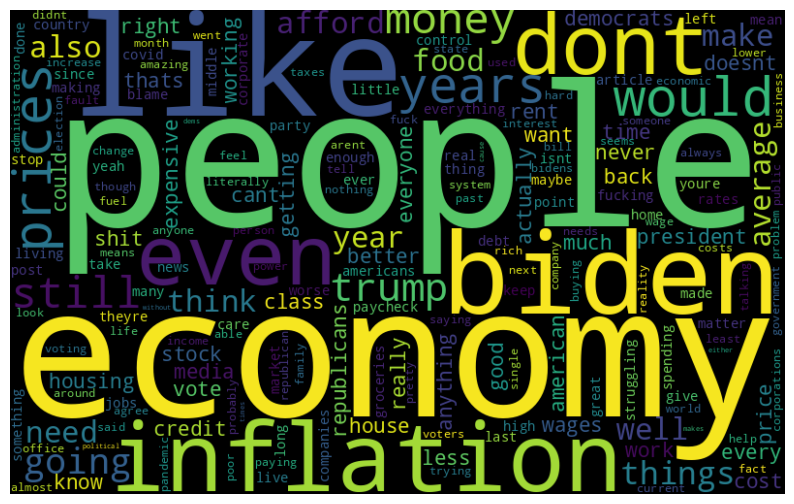

In [124]:

textblob_neutral_comments = reddit_data1[reddit_data1['textblob_sentiment'] == 'Neutral Sentiment']['comment'] # filtering out only neutral sentiment comments
textblob_words_neu = ' '.join([text for text in textblob_neutral_comments])  # Concatenates all the text from positive comments into a single string
count_word = collections.Counter(textblob_words_neu.split())  # Tokenize the all_words and count their frequencies

wordcloud = WordCloud(width=800, height=500)  # Create a word cloud object with specified width and height in pixels
wordcloud.generate_from_frequencies(count_word)  # Generate the word cloud from the word frequencies calculated earlier

plt.figure(figsize=(10, 7))  # Set figure size in inches
plt.imshow(wordcloud, interpolation='bilinear')  # Display the word cloud, with bilinear interpolation for rendering edges smoother
plt.axis("off")  # Turn off the axis
plt.show()  # Show the plot

In [125]:
count_word = collections.Counter(textblob_words_neu.split()) # applying the counter to count the frequency of each word
count_word.most_common(20) # getting the most common 20 words
textblob_neu20 = count_word.most_common(20) # setting an object equal to it


textblob_neu20 # print the top 20 words

[('people', 440),
 ('economy', 373),
 ('like', 217),
 ('biden', 216),
 ('inflation', 204),
 ('even', 153),
 ('dont', 150),
 ('would', 145),
 ('prices', 139),
 ('years', 129),
 ('still', 127),
 ('money', 127),
 ('trump', 125),
 ('going', 123),
 ('things', 119),
 ('think', 103),
 ('well', 102),
 ('make', 101),
 ('year', 98),
 ('afford', 95)]

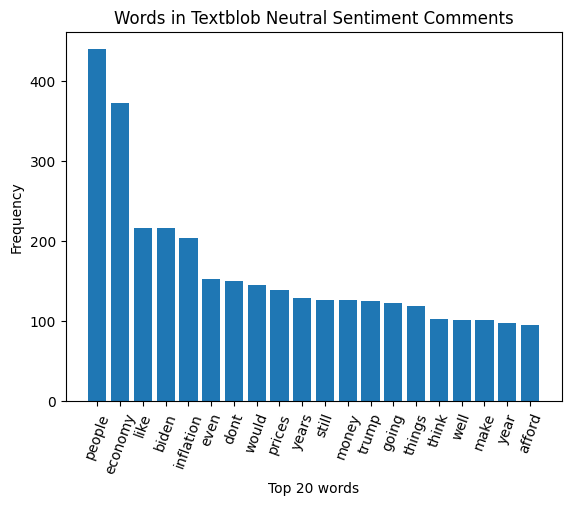

In [126]:
plt.bar(range(20), [val[1] for val in textblob_neu20], align = "center") # sets bars equal to the top 20 words values, and ticks to the top 20 words (next line)
plt.xticks(range(20), [val[0] for val in textblob_neu20])
plt.xticks(rotation=70) # rotating the values
plt.xlabel('Top 20 words') # labeling x-axis
plt.ylabel('Frequency') # labeling y-axis
plt.title('Words in Textblob Neutral Sentiment Comments') # titling the barchart
plt.show()

Textblob Negative Visualizations

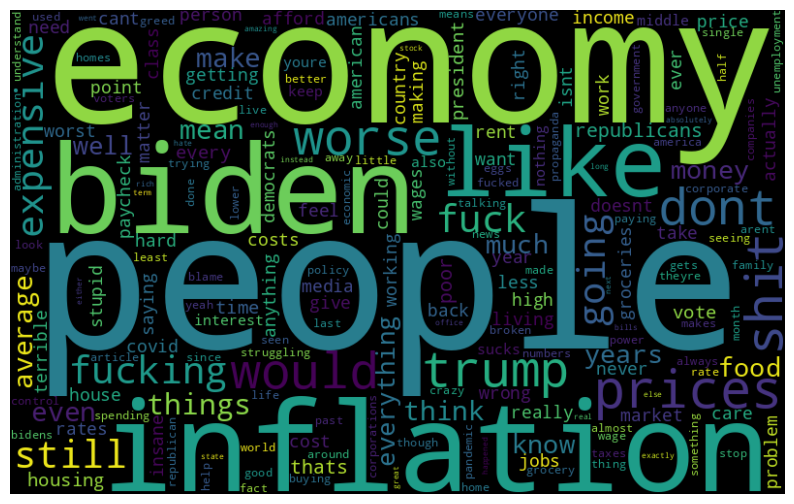

In [127]:

textblob_negative_comments = reddit_data1[reddit_data1['textblob_sentiment'] == 'Negative Sentiment']['comment'] # filtering out only negative sentiment comments
textblob_words_neg = ' '.join([text for text in textblob_negative_comments])  # Concatenates all the text from positive comments into a single string
count_word = collections.Counter(textblob_words_neg.split())  # Tokenize the all_words and count their frequencies

wordcloud = WordCloud(width=800, height=500)  # Create a word cloud object with specified width and height in pixels
wordcloud.generate_from_frequencies(count_word)  # Generate the word cloud from the word frequencies calculated earlier

plt.figure(figsize=(10, 7))  # Set figure size in inches
plt.imshow(wordcloud, interpolation='bilinear')  # Display the word cloud, with bilinear interpolation for rendering edges smoother
plt.axis("off")  # Turn off the axis
plt.show()  # Show the plot

In [128]:
count_word = collections.Counter(textblob_words_neg.split())  # applying the counter to count the frequency of each word
count_word.most_common(20) # getting the most common 20 words
textblob_neg20 = count_word.most_common(20) # setting an object equal to it

textblob_neg20 # print the top 20 words

[('people', 339),
 ('economy', 261),
 ('inflation', 181),
 ('biden', 175),
 ('like', 150),
 ('prices', 117),
 ('shit', 112),
 ('trump', 105),
 ('dont', 105),
 ('worse', 104),
 ('would', 103),
 ('fucking', 97),
 ('fuck', 96),
 ('expensive', 96),
 ('still', 95),
 ('going', 95),
 ('things', 93),
 ('even', 83),
 ('think', 82),
 ('mean', 80)]

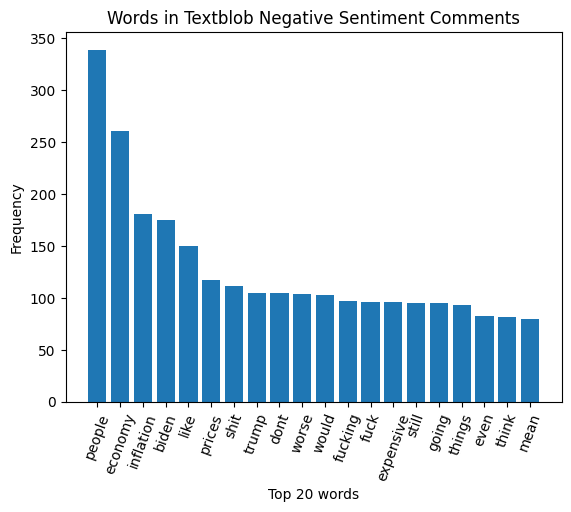

In [129]:
plt.bar(range(20), [val[1] for val in textblob_neg20], align = "center") # sets bars equal to the top 20 words values, and ticks to the top 20 words (next line)
plt.xticks(range(20), [val[0] for val in textblob_neg20])
plt.xticks(rotation=70) # rotating the values
plt.xlabel('Top 20 words') # labeling x-axis
plt.ylabel('Frequency') # labeling y-axis
plt.title('Words in Textblob Negative Sentiment Comments') # titling the barchart
plt.show()

In [130]:
# Counting the number of sentiment for each case of positive, negative and neutral.
reddit_data1['textblob_sentiment'].value_counts()

textblob_sentiment
Positive Sentiment    2412
Neutral Sentiment     1642
Negative Sentiment    1019
Name: count, dtype: int64

Start of Vader Sentiment Analysis

In [131]:
nltk.download('vader_lexicon') # from nltk, downloading vader for sentiment analysis
from nltk.sentiment import SentimentIntensityAnalyzer  # importing the sentiment analyzer

sid = SentimentIntensityAnalyzer()                    # creating an object to hold the SentimentIntensityAnalyzer object

def get_vader_label(text): # defining a function
    return sid.polarity_scores(text) # returning the vader sentiment of the text

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [132]:
# Apply sentiment analysis to the DataFrame to get scores
reddit_data1['compound_score'] = reddit_data1['comment'].apply(get_vader_label) # apply ing function
reddit_data1.head() # checking to see if the code ran

comment    ups  downs  \
0  reminder subreddit politics wiki index general...      1      0   
1  long food fuel housing prices high especially ...  10767      0   
2  working class american better anyone know much...   1490      0   
3  left leaning keep saying great economy prices ...   1616      0   
4  idgaf economy care cost life groceries housing...    389      0   

        created            date_time        date  character_count  word_count  \
0  1.699886e+09  2023-11-13 14:30:01  2023-11-13              872         117   
1  1.699887e+09  2023-11-13 14:52:46  2023-11-13              286          50   
2  1.699887e+09  2023-11-13 14:44:38  2023-11-13              142          28   
3  1.699886e+09  2023-11-13 14:31:50  2023-11-13              152          29   
4  1.699889e+09  2023-11-13 15:25:14  2023-11-13              135          25   

                                           tokenized  polarity  subjectivity  \
0  [remind, subreddit, polit, wiki, index, gener,...    -0.010        0.5600   
1  [long, food, fuel, hous, price, high, especi, ...    -0.010        0.5850   
2  [work, class, american, better, anyon, know, m...     0.165        0.3400   
3  [left, lean, keep, say, great, economi, price,...     0.400        0.4625   
4  [idgaf, economi, care, cost, life, groceri, ho...     0.250        0.5000   

   textblob_sentiment                                     compound_score  
0   Neutral Sentiment  {'neg': 0.311, 'neu': 0.467, 'pos': 0.222, 'co...  
1   Neutral Sentiment  {'neg': 0.0, 'neu': 0.95, 'pos': 0.05, 'compou...  
2  Positive Sentiment  {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp...  
3  Positive Sentiment  {'neg': 0.0, 'neu': 0.457, 'pos': 0.543, 'comp...  
4  Positive Sentiment  {'neg': 0.159, 'neu': 0.621, 'pos': 0.221, 'co...

In [133]:
def get_vader_pos(text): # defining a function
  return sid.polarity_scores(text)['pos'] # gets positive score associated to the key

reddit_data1['pos_score'] = reddit_data1['comment'].apply(get_vader_pos) # applying the function and creating a column for the positive scores
reddit_data1.head() # checking to see if the code ran

comment    ups  downs  \
0  reminder subreddit politics wiki index general...      1      0   
1  long food fuel housing prices high especially ...  10767      0   
2  working class american better anyone know much...   1490      0   
3  left leaning keep saying great economy prices ...   1616      0   
4  idgaf economy care cost life groceries housing...    389      0   

        created            date_time        date  character_count  word_count  \
0  1.699886e+09  2023-11-13 14:30:01  2023-11-13              872         117   
1  1.699887e+09  2023-11-13 14:52:46  2023-11-13              286          50   
2  1.699887e+09  2023-11-13 14:44:38  2023-11-13              142          28   
3  1.699886e+09  2023-11-13 14:31:50  2023-11-13              152          29   
4  1.699889e+09  2023-11-13 15:25:14  2023-11-13              135          25   

                                           tokenized  polarity  subjectivity  \
0  [remind, subreddit, polit, wiki, index, gener,...    -0.010        0.5600   
1  [long, food, fuel, hous, price, high, especi, ...    -0.010        0.5850   
2  [work, class, american, better, anyon, know, m...     0.165        0.3400   
3  [left, lean, keep, say, great, economi, price,...     0.400        0.4625   
4  [idgaf, economi, care, cost, life, groceri, ho...     0.250        0.5000   

   textblob_sentiment                                     compound_score  \
0   Neutral Sentiment  {'neg': 0.311, 'neu': 0.467, 'pos': 0.222, 'co...   
1   Neutral Sentiment  {'neg': 0.0, 'neu': 0.95, 'pos': 0.05, 'compou...   
2  Positive Sentiment  {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp...   
3  Positive Sentiment  {'neg': 0.0, 'neu': 0.457, 'pos': 0.543, 'comp...   
4  Positive Sentiment  {'neg': 0.159, 'neu': 0.621, 'pos': 0.221, 'co...   

   pos_score  
0      0.222  
1      0.050  
2      0.492  
3      0.543  
4      0.221

In [134]:
def get_vader_neg(text): # defining a function
  return sid.polarity_scores(text)['neg'] # getting negative score

reddit_data1['neg_score'] = reddit_data1['comment'].apply(get_vader_neg) # applying the function and creating a column for the negative scores
reddit_data1.head() # checking to see if the code ran

comment    ups  downs  \
0  reminder subreddit politics wiki index general...      1      0   
1  long food fuel housing prices high especially ...  10767      0   
2  working class american better anyone know much...   1490      0   
3  left leaning keep saying great economy prices ...   1616      0   
4  idgaf economy care cost life groceries housing...    389      0   

        created            date_time        date  character_count  word_count  \
0  1.699886e+09  2023-11-13 14:30:01  2023-11-13              872         117   
1  1.699887e+09  2023-11-13 14:52:46  2023-11-13              286          50   
2  1.699887e+09  2023-11-13 14:44:38  2023-11-13              142          28   
3  1.699886e+09  2023-11-13 14:31:50  2023-11-13              152          29   
4  1.699889e+09  2023-11-13 15:25:14  2023-11-13              135          25   

                                           tokenized  polarity  subjectivity  \
0  [remind, subreddit, polit, wiki, index, gener,...    -0.010        0.5600   
1  [long, food, fuel, hous, price, high, especi, ...    -0.010        0.5850   
2  [work, class, american, better, anyon, know, m...     0.165        0.3400   
3  [left, lean, keep, say, great, economi, price,...     0.400        0.4625   
4  [idgaf, economi, care, cost, life, groceri, ho...     0.250        0.5000   

   textblob_sentiment                                     compound_score  \
0   Neutral Sentiment  {'neg': 0.311, 'neu': 0.467, 'pos': 0.222, 'co...   
1   Neutral Sentiment  {'neg': 0.0, 'neu': 0.95, 'pos': 0.05, 'compou...   
2  Positive Sentiment  {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp...   
3  Positive Sentiment  {'neg': 0.0, 'neu': 0.457, 'pos': 0.543, 'comp...   
4  Positive Sentiment  {'neg': 0.159, 'neu': 0.621, 'pos': 0.221, 'co...   

   pos_score  neg_score  
0      0.222      0.311  
1      0.050      0.000  
2      0.492      0.000  
3      0.543      0.000  
4      0.221      0.159

In [135]:
def get_vader_compound(text): # defining a function
  return sid.polarity_scores(text)['compound'] # getting compound score ,the compound score is the important score

reddit_data1['compound_score'] = reddit_data1['comment'].apply(get_vader_compound) # applying the function and creating a column for the compound scores
reddit_data1.head() # checking to see if the code ran

comment    ups  downs  \
0  reminder subreddit politics wiki index general...      1      0   
1  long food fuel housing prices high especially ...  10767      0   
2  working class american better anyone know much...   1490      0   
3  left leaning keep saying great economy prices ...   1616      0   
4  idgaf economy care cost life groceries housing...    389      0   

        created            date_time        date  character_count  word_count  \
0  1.699886e+09  2023-11-13 14:30:01  2023-11-13              872         117   
1  1.699887e+09  2023-11-13 14:52:46  2023-11-13              286          50   
2  1.699887e+09  2023-11-13 14:44:38  2023-11-13              142          28   
3  1.699886e+09  2023-11-13 14:31:50  2023-11-13              152          29   
4  1.699889e+09  2023-11-13 15:25:14  2023-11-13              135          25   

                                           tokenized  polarity  subjectivity  \
0  [remind, subreddit, polit, wiki, index, gener,...    -0.010        0.5600   
1  [long, food, fuel, hous, price, high, especi, ...    -0.010        0.5850   
2  [work, class, american, better, anyon, know, m...     0.165        0.3400   
3  [left, lean, keep, say, great, economi, price,...     0.400        0.4625   
4  [idgaf, economi, care, cost, life, groceri, ho...     0.250        0.5000   

   textblob_sentiment  compound_score  pos_score  neg_score  
0   Neutral Sentiment         -0.8846      0.222      0.311  
1   Neutral Sentiment          0.0258      0.050      0.000  
2  Positive Sentiment          0.8658      0.492      0.000  
3  Positive Sentiment          0.8591      0.543      0.000  
4  Positive Sentiment          0.2263      0.221      0.159

In [136]:
reddit_data1["compound_score"].mean() # getting the mean of the compound score

0.10594744726986005

In [137]:
reddit_data1["compound_score"].std() # getting the standard deviation of the compound score

0.5320530754877102

In [138]:
# Create a function to classify the polarity
def analyze_sentimenttxt(text): # defining the function
    if text >= 0.05: # if compound is greater or equal to 0.05
        return 'Positive Sentiment' # return pos sentiment
    elif text <= -0.05: # if compound is less than or equal to -0.05
        return 'Negative Sentiment' # return negative sentiment
    else: # if all conditions are false
        return 'Neutral Sentiment' # then return neutral sentiment

In [139]:
reddit_data1['vader_sentiment'] = reddit_data1['compound_score'].apply(analyze_sentimenttxt) # applying labeling function
reddit_data1.head() # checking to see if the code ran

comment    ups  downs  \
0  reminder subreddit politics wiki index general...      1      0   
1  long food fuel housing prices high especially ...  10767      0   
2  working class american better anyone know much...   1490      0   
3  left leaning keep saying great economy prices ...   1616      0   
4  idgaf economy care cost life groceries housing...    389      0   

        created            date_time        date  character_count  word_count  \
0  1.699886e+09  2023-11-13 14:30:01  2023-11-13              872         117   
1  1.699887e+09  2023-11-13 14:52:46  2023-11-13              286          50   
2  1.699887e+09  2023-11-13 14:44:38  2023-11-13              142          28   
3  1.699886e+09  2023-11-13 14:31:50  2023-11-13              152          29   
4  1.699889e+09  2023-11-13 15:25:14  2023-11-13              135          25   

                                           tokenized  polarity  subjectivity  \
0  [remind, subreddit, polit, wiki, index, gener,...    -0.010        0.5600   
1  [long, food, fuel, hous, price, high, especi, ...    -0.010        0.5850   
2  [work, class, american, better, anyon, know, m...     0.165        0.3400   
3  [left, lean, keep, say, great, economi, price,...     0.400        0.4625   
4  [idgaf, economi, care, cost, life, groceri, ho...     0.250        0.5000   

   textblob_sentiment  compound_score  pos_score  neg_score  \
0   Neutral Sentiment         -0.8846      0.222      0.311   
1   Neutral Sentiment          0.0258      0.050      0.000   
2  Positive Sentiment          0.8658      0.492      0.000   
3  Positive Sentiment          0.8591      0.543      0.000   
4  Positive Sentiment          0.2263      0.221      0.159   

      vader_sentiment  
0  Negative Sentiment  
1   Neutral Sentiment  
2  Positive Sentiment  
3  Positive Sentiment  
4  Positive Sentiment

In [140]:
reddit_data1 # inspecting the data to ensure that of all of changes were correctly made

comment    ups  downs  \
0     reminder subreddit politics wiki index general...      1      0   
1     long food fuel housing prices high especially ...  10767      0   
2     working class american better anyone know much...   1490      0   
3     left leaning keep saying great economy prices ...   1616      0   
4     idgaf economy care cost life groceries housing...    389      0   
...                                                 ...    ...    ...   
5068  stated wasnt opposed congress merely stated wa...      0      0   
5069                                youre close getting      1      0   
5070  absolutely cannot fptp stroke congress even li...      1      0   
5071                       think youre full established      1      0   
5072                                 voting many things      1      0   

           created            date_time        date  character_count  \
0     1.699886e+09  2023-11-13 14:30:01  2023-11-13              872   
1     1.699887e+09  2023-11-13 14:52:46  2023-11-13              286   
2     1.699887e+09  2023-11-13 14:44:38  2023-11-13              142   
3     1.699886e+09  2023-11-13 14:31:50  2023-11-13              152   
4     1.699889e+09  2023-11-13 15:25:14  2023-11-13              135   
...            ...                  ...         ...              ...   
5068  1.699908e+09  2023-11-13 20:44:07  2023-11-13              122   
5069  1.700108e+09  2023-11-16 04:18:35  2023-11-16               30   
5070  1.699914e+09  2023-11-13 22:25:13  2023-11-13              207   
5071  1.700109e+09  2023-11-16 04:21:49  2023-11-16               89   
5072  1.699915e+09  2023-11-13 22:34:29  2023-11-13               39   

      word_count                                          tokenized  polarity  \
0            117  [remind, subreddit, polit, wiki, index, gener,... -0.010000   
1             50  [long, food, fuel, hous, price, high, especi, ... -0.010000   
2             28  [work, class, american, better, anyon, know, m...  0.165000   
3             29  [left, lean, keep, say, great, economi, price,...  0.400000   
4             25  [idgaf, economi, care, cost, life, groceri, ho...  0.250000   
...          ...                                                ...       ...   
5068          26  [state, wasnt, oppos, congress, mere, state, w... -0.150000   
5069           6                                 [your, close, get]  0.000000   
5070          41  [absolut, cannot, fptp, stroke, congress, even...  0.004167   
5071          19                     [think, your, full, establish]  0.350000   
5072           8                                [vote, mani, thing]  0.500000   

      subjectivity  textblob_sentiment  compound_score  pos_score  neg_score  \
0           0.5600   Neutral Sentiment         -0.8846      0.222      0.311   
1           0.5850   Neutral Sentiment          0.0258      0.050      0.000   
2           0.3400  Positive Sentiment          0.8658      0.492      0.000   
3           0.4625  Positive Sentiment          0.8591      0.543      0.000   
4           0.5000  Positive Sentiment          0.2263      0.221      0.159   
...            ...                 ...             ...        ...        ...   
5068        0.3500  Negative Sentiment          0.0000      0.000      0.000   
5069        0.0000   Neutral Sentiment          0.0000      0.000      0.000   
5070        0.8000   Neutral Sentiment          0.0258      0.084      0.000   
5071        0.5500  Positive Sentiment          0.0000      0.000      0.000   
5072        0.5000  Positive Sentiment          0.0000      0.000      0.000   

         vader_sentiment  
0     Negative Sentiment  
1      Neutral Sentiment  
2     Positive Sentiment  
3     Positive Sentiment  
4     Positive Sentiment  
...                  ...  
5068   Neutral Sentiment  
5069   Neutral Sentiment  
5070   Neutral Sentiment  
5071   Neutral Sentiment  
5072   Neutral Sentiment  

[5073 rows x 16 columns]

In [141]:
reddit_data1.shape # using shape to determine if there are the correct number of columns -- after the changes

(5073, 16)

In [142]:
# Counting the number of sentiment for each case of positive, negative and neutral.
reddit_data1['vader_sentiment'].value_counts()

vader_sentiment
Positive Sentiment    2424
Negative Sentiment    1697
Neutral Sentiment      952
Name: count, dtype: int64

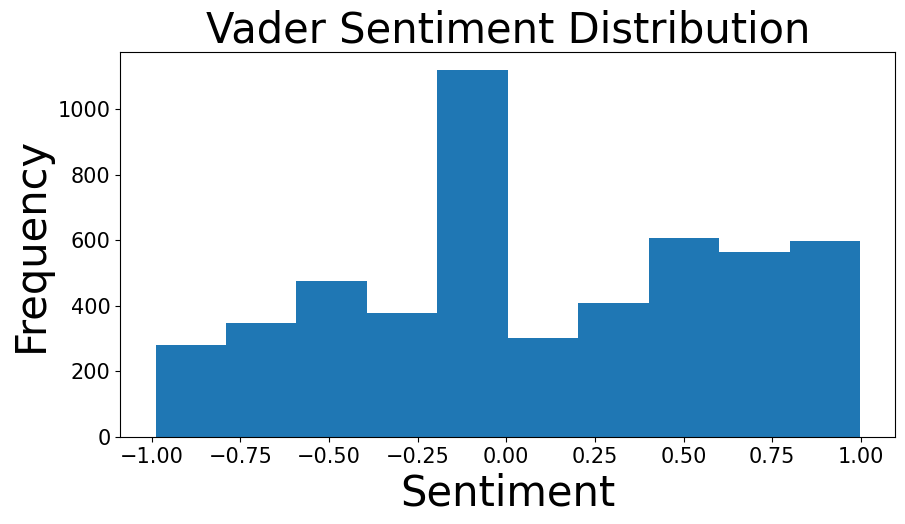

In [143]:
# Bar chart of the sentiment
plt.figure(figsize=(10,5)) # setting the size
plt.xlabel('Sentiment', fontsize=30) # setting the x label
plt.xticks(fontsize=15)  # formatting axis and label size
plt.ylabel('Frequency', fontsize=30)
plt.yticks(fontsize=15)
plt.hist(reddit_data1['compound_score'], bins=10) # setting the number of bins in the histogram
plt.title('Vader Sentiment Distribution', fontsize=30) # formating title
plt.show()

Vader Positive Visualizations

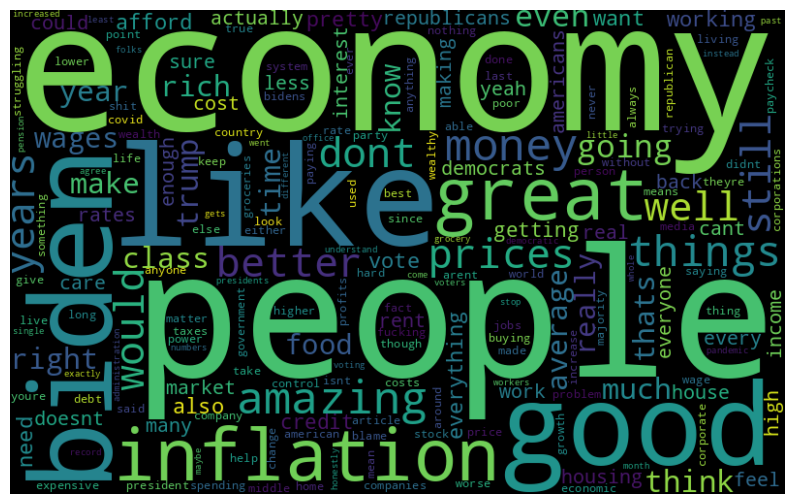

In [144]:

positive_comments = reddit_data1[reddit_data1['vader_sentiment'] == 'Positive Sentiment']['comment'] # filtering out only positive sentiment comments
words_pos = ' '.join([text for text in positive_comments])  # Concatenates all the text from positive comments into a single string
count_word = collections.Counter(words_pos.split())  # Tokenize the all_words and count their frequencies

wordcloud = WordCloud(width=800, height=500)  # Create a word cloud object with specified width and height in pixels
wordcloud.generate_from_frequencies(count_word)  # Generate the word cloud from the word frequencies calculated earlier

plt.figure(figsize=(10, 7))  # Set figure size in inches
plt.imshow(wordcloud, interpolation='bilinear')  # Display the word cloud, with bilinear interpolation for rendering edges smoother
plt.axis("off")  # Turn off the axis
plt.show()  # Show the plot

In [145]:
count_word = collections.Counter(words_pos.split()) # applying the counter to count the frequency of each word
count_word.most_common(20)  # getting the most common 20 words
vader_pos20 = count_word.most_common(20) # setting an object equal to it

vader_pos20  # print the top 20 words

[('economy', 1078),
 ('people', 1039),
 ('like', 577),
 ('good', 485),
 ('biden', 482),
 ('inflation', 406),
 ('great', 403),
 ('amazing', 358),
 ('money', 345),
 ('things', 316),
 ('prices', 313),
 ('still', 306),
 ('would', 304),
 ('better', 299),
 ('dont', 292),
 ('years', 290),
 ('well', 281),
 ('going', 281),
 ('even', 272),
 ('think', 254)]

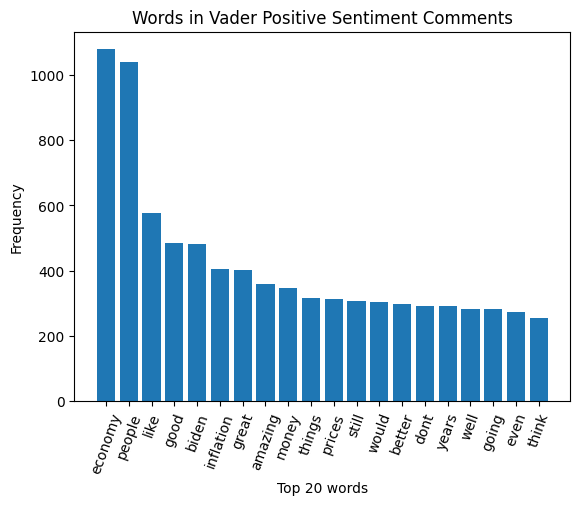

In [146]:
plt.bar(range(20), [val[1] for val in vader_pos20], align = "center") # sets bars equal to the top 20 words values, and ticks to the top 20 words (next line)
plt.xticks(range(20), [val[0] for val in vader_pos20])
plt.xticks(rotation=70) # rotating the values
plt.xlabel('Top 20 words') # labeling x-axis
plt.ylabel('Frequency') # labeling y-axis
plt.title('Words in Vader Positive Sentiment Comments') # titling the barchart
plt.show()

Vader Negative Visualizations

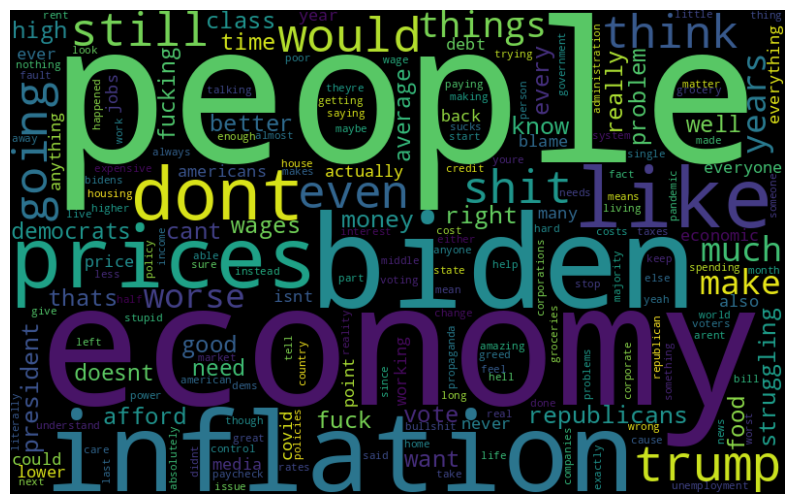

In [147]:

negative_comments = reddit_data1[reddit_data1['vader_sentiment'] == 'Negative Sentiment']['comment'] # filtering out only negative sentiment comments
words_neg = ' '.join([text for text in negative_comments])  # Concatenates all the text from positive comments into a single string
count_word = collections.Counter(words_neg.split())  # Tokenize the all_words and count their frequencies

wordcloud = WordCloud(width=800, height=500)  # Create a word cloud object with specified width and height in pixels
wordcloud.generate_from_frequencies(count_word)  # Generate the word cloud from the word frequencies calculated earlier

plt.figure(figsize=(10, 7))  # Set figure size in inches
plt.imshow(wordcloud, interpolation='bilinear')  # Display the word cloud, with bilinear interpolation for rendering edges smoother
plt.axis("off")  # Turn off the axis
plt.show()  # Show the plot

In [148]:
count_word = collections.Counter(words_neg.split()) # applying the counter to count the frequency of each word
negative_words = count_word.most_common(20)  # getting the most common 20 words
negative_words # print the top 20 words


[('people', 714),
 ('economy', 537),
 ('biden', 404),
 ('inflation', 351),
 ('prices', 227),
 ('like', 222),
 ('dont', 216),
 ('trump', 216),
 ('would', 197),
 ('going', 196),
 ('even', 186),
 ('still', 184),
 ('think', 173),
 ('shit', 172),
 ('things', 170),
 ('make', 149),
 ('years', 145),
 ('worse', 141),
 ('much', 141),
 ('republicans', 139)]

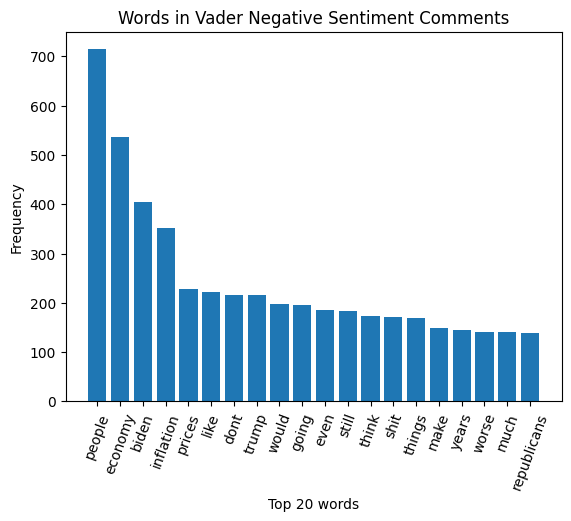

In [149]:
plt.bar(range(20), [val[1] for val in negative_words], align = "center") # sets bars equal to the top 20 words values, and ticks to the top 20 words (next line)
plt.xticks(range(20), [val[0] for val in negative_words])
plt.xticks(rotation=70) # rotating the values
plt.xlabel('Top 20 words') # labeling x-axis
plt.ylabel('Frequency') # labeling y-axis
plt.title('Words in Vader Negative Sentiment Comments') # titling the barchart
plt.show()

Vader Neutral Visualizations

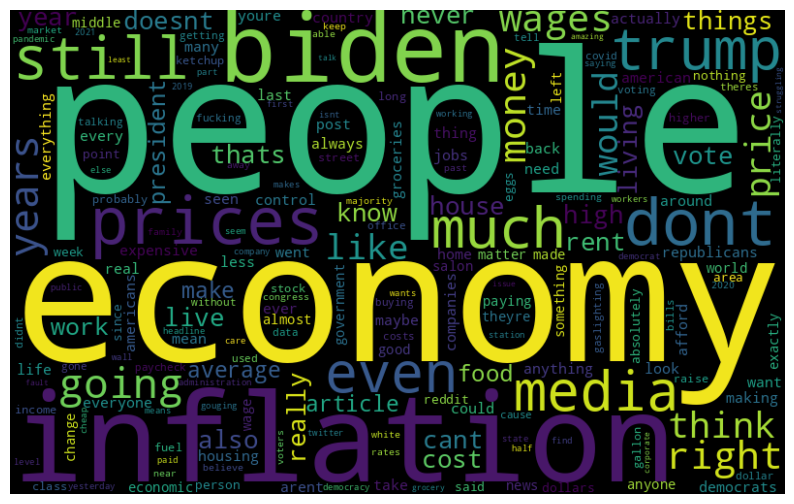

In [150]:

neutral_comments = reddit_data1[reddit_data1['vader_sentiment'] == 'Neutral Sentiment']['comment'] # filtering out only neutral sentiment comments
words_neu = ' '.join([text for text in neutral_comments])  # Concatenates all the text from positive comments into a single string
count_word = collections.Counter(words_neu.split())  # Tokenize the all_words and count their frequencies

wordcloud = WordCloud(width=800, height=500)  # Create a word cloud object with specified width and height in pixels
wordcloud.generate_from_frequencies(count_word)  # Generate the word cloud from the word frequencies calculated earlier

plt.figure(figsize=(10, 7))  # Set figure size in inches
plt.imshow(wordcloud, interpolation='bilinear')  # Display the word cloud, with bilinear interpolation for rendering edges smoother
plt.axis("off")  # Turn off the axis
plt.show()  # Show the plot

In [151]:
count_word = collections.Counter(words_neu.split()) # applying the counter to count the frequency of each word
count_word.most_common(20)  # getting the most common 20 words
neutral_words = count_word.most_common(20) # setting an object equal to it
neutral_words # print the top 20 words


[('people', 107),
 ('economy', 93),
 ('inflation', 88),
 ('biden', 67),
 ('prices', 54),
 ('dont', 52),
 ('still', 44),
 ('trump', 43),
 ('much', 41),
 ('media', 39),
 ('even', 39),
 ('going', 38),
 ('years', 37),
 ('right', 34),
 ('money', 34),
 ('wages', 33),
 ('price', 30),
 ('think', 30),
 ('like', 29),
 ('would', 29)]

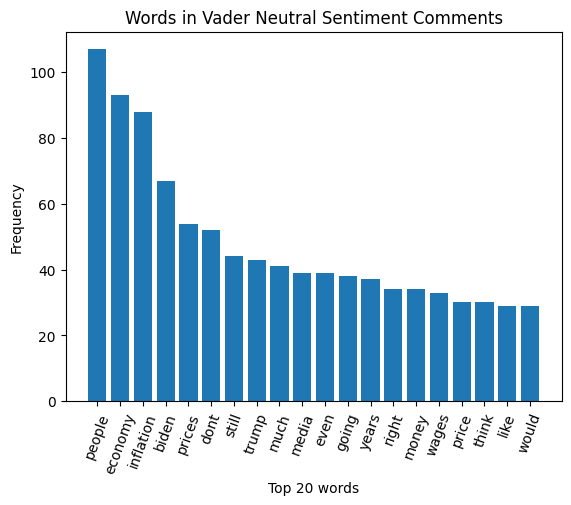

In [152]:
plt.bar(range(20), [val[1] for val in neutral_words], align = "center") # sets bars equal to the top 20 words values, and ticks to the top 20 words (next line)
plt.xticks(range(20), [val[0] for val in neutral_words])
plt.xticks(rotation=70) # rotating the values
plt.xlabel('Top 20 words') # labeling x-axis
plt.ylabel('Frequency') # labeling y-axis
plt.title('Words in Vader Neutral Sentiment Comments') # titling the barchart
plt.show()

**Machine Learning**

In [153]:
reddit_data1 # inspecting the data before the start of machine learning

comment    ups  downs  \
0     reminder subreddit politics wiki index general...      1      0   
1     long food fuel housing prices high especially ...  10767      0   
2     working class american better anyone know much...   1490      0   
3     left leaning keep saying great economy prices ...   1616      0   
4     idgaf economy care cost life groceries housing...    389      0   
...                                                 ...    ...    ...   
5068  stated wasnt opposed congress merely stated wa...      0      0   
5069                                youre close getting      1      0   
5070  absolutely cannot fptp stroke congress even li...      1      0   
5071                       think youre full established      1      0   
5072                                 voting many things      1      0   

           created            date_time        date  character_count  \
0     1.699886e+09  2023-11-13 14:30:01  2023-11-13              872   
1     1.699887e+09  2023-11-13 14:52:46  2023-11-13              286   
2     1.699887e+09  2023-11-13 14:44:38  2023-11-13              142   
3     1.699886e+09  2023-11-13 14:31:50  2023-11-13              152   
4     1.699889e+09  2023-11-13 15:25:14  2023-11-13              135   
...            ...                  ...         ...              ...   
5068  1.699908e+09  2023-11-13 20:44:07  2023-11-13              122   
5069  1.700108e+09  2023-11-16 04:18:35  2023-11-16               30   
5070  1.699914e+09  2023-11-13 22:25:13  2023-11-13              207   
5071  1.700109e+09  2023-11-16 04:21:49  2023-11-16               89   
5072  1.699915e+09  2023-11-13 22:34:29  2023-11-13               39   

      word_count                                          tokenized  polarity  \
0            117  [remind, subreddit, polit, wiki, index, gener,... -0.010000   
1             50  [long, food, fuel, hous, price, high, especi, ... -0.010000   
2             28  [work, class, american, better, anyon, know, m...  0.165000   
3             29  [left, lean, keep, say, great, economi, price,...  0.400000   
4             25  [idgaf, economi, care, cost, life, groceri, ho...  0.250000   
...          ...                                                ...       ...   
5068          26  [state, wasnt, oppos, congress, mere, state, w... -0.150000   
5069           6                                 [your, close, get]  0.000000   
5070          41  [absolut, cannot, fptp, stroke, congress, even...  0.004167   
5071          19                     [think, your, full, establish]  0.350000   
5072           8                                [vote, mani, thing]  0.500000   

      subjectivity  textblob_sentiment  compound_score  pos_score  neg_score  \
0           0.5600   Neutral Sentiment         -0.8846      0.222      0.311   
1           0.5850   Neutral Sentiment          0.0258      0.050      0.000   
2           0.3400  Positive Sentiment          0.8658      0.492      0.000   
3           0.4625  Positive Sentiment          0.8591      0.543      0.000   
4           0.5000  Positive Sentiment          0.2263      0.221      0.159   
...            ...                 ...             ...        ...        ...   
5068        0.3500  Negative Sentiment          0.0000      0.000      0.000   
5069        0.0000   Neutral Sentiment          0.0000      0.000      0.000   
5070        0.8000   Neutral Sentiment          0.0258      0.084      0.000   
5071        0.5500  Positive Sentiment          0.0000      0.000      0.000   
5072        0.5000  Positive Sentiment          0.0000      0.000      0.000   

         vader_sentiment  
0     Negative Sentiment  
1      Neutral Sentiment  
2     Positive Sentiment  
3     Positive Sentiment  
4     Positive Sentiment  
...                  ...  
5068   Neutral Sentiment  
5069   Neutral Sentiment  
5070   Neutral Sentiment  
5071   Neutral Sentiment  
5072   Neutral Sentiment  

[5073 rows x 16 columns]

**Filtering out neutrals for Vader Machine Learning, using comments_pos_neg going forward**

In [154]:
comments_pos_neg = reddit_data1[reddit_data1['vader_sentiment'] != 'Neutral Sentiment'] # filtering out neutrals, setting it equal to a new df comments_pos_neg --- use that for the rest of the machine learning


In [155]:
comments_pos_neg.head() # checking to see if df was created correctly

comment   ups  downs  \
0  reminder subreddit politics wiki index general...     1      0   
2  working class american better anyone know much...  1490      0   
3  left leaning keep saying great economy prices ...  1616      0   
4  idgaf economy care cost life groceries housing...   389      0   
5  isnt reality people ignoring replies people te...  1193      0   

        created            date_time        date  character_count  word_count  \
0  1.699886e+09  2023-11-13 14:30:01  2023-11-13              872         117   
2  1.699887e+09  2023-11-13 14:44:38  2023-11-13              142          28   
3  1.699886e+09  2023-11-13 14:31:50  2023-11-13              152          29   
4  1.699889e+09  2023-11-13 15:25:14  2023-11-13              135          25   
5  1.699886e+09  2023-11-13 14:38:15  2023-11-13              218          41   

                                           tokenized  polarity  subjectivity  \
0  [remind, subreddit, polit, wiki, index, gener,... -0.010000      0.560000   
2  [work, class, american, better, anyon, know, m...  0.165000      0.340000   
3  [left, lean, keep, say, great, economi, price,...  0.400000      0.462500   
4  [idgaf, economi, care, cost, life, groceri, ho...  0.250000      0.500000   
5  [isnt, realiti, peopl, ignor, repli, peopl, te...  0.272222      0.616667   

   textblob_sentiment  compound_score  pos_score  neg_score  \
0   Neutral Sentiment         -0.8846      0.222      0.311   
2  Positive Sentiment          0.8658      0.492      0.000   
3  Positive Sentiment          0.8591      0.543      0.000   
4  Positive Sentiment          0.2263      0.221      0.159   
5  Positive Sentiment          0.5667      0.347      0.194   

      vader_sentiment  
0  Negative Sentiment  
2  Positive Sentiment  
3  Positive Sentiment  
4  Positive Sentiment  
5  Positive Sentiment

In [156]:
comments_pos_neg["vader_sentiment_binary"] = np.where(comments_pos_neg["vader_sentiment"] == "Positive Sentiment", 1, 0) # creating a binary variable for the vader sentiment

<ipython-input-156-4d5e392bdad2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_pos_neg["vader_sentiment_binary"] = np.where(comments_pos_neg["vader_sentiment"] == "Positive Sentiment", 1, 0) # creating a binary variable for the vader sentiment


In [157]:
# Assuming your DataFrame is called df and the column with comments is named 'comments'
# Let's say you have a list of words to check for
profanity_list = ["siht", "hell", "fucking", "sucks", "fuck", "fucked", "idgaf"]   # Add more words as needed

# Define a function to check if any word in profanity_list is in the comment
def check_profanity(comment, words_to_check):
    # Make the comment lowercase to make the search case-insensitive
    comment_lower = comment.lower()
    return any(word in comment_lower for word in words_to_check) # returns a bol value, True or False

# Apply the function to each comment, passing the list of profane words
comments_pos_neg['contains_profanity'] = comments_pos_neg['comment'].apply(check_profanity, words_to_check=profanity_list)



<ipython-input-157-1f4e9340f07e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_pos_neg['contains_profanity'] = comments_pos_neg['comment'].apply(check_profanity, words_to_check=profanity_list)


In [158]:
comments_pos_neg["contains_profanity"] = np.where(comments_pos_neg["contains_profanity"] == True, 1,0) # creating a binary variable for contains profanity

<ipython-input-158-e5da530ae639>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_pos_neg["contains_profanity"] = np.where(comments_pos_neg["contains_profanity"] == True, 1,0) # creating a binary variable for contains profanity


In [159]:
comments_pos_neg.head(10)

comment   ups  downs  \
0   reminder subreddit politics wiki index general...     1      0   
2   working class american better anyone know much...  1490      0   
3   left leaning keep saying great economy prices ...  1616      0   
4   idgaf economy care cost life groceries housing...   389      0   
5   isnt reality people ignoring replies people te...  1193      0   
7   well living paycheck paycheck working hours we...   226      0   
8                                        economy good   163      0   
9   look bidens side holy shit left needs stop ton...   157      0   
10                      poor ever adult sign changing   173      0   
12  amazing question reflection never seems make p...    96      0   

         created            date_time        date  character_count  \
0   1.699886e+09  2023-11-13 14:30:01  2023-11-13              872   
2   1.699887e+09  2023-11-13 14:44:38  2023-11-13              142   
3   1.699886e+09  2023-11-13 14:31:50  2023-11-13              152   
4   1.699889e+09  2023-11-13 15:25:14  2023-11-13              135   
5   1.699886e+09  2023-11-13 14:38:15  2023-11-13              218   
7   1.699889e+09  2023-11-13 15:31:13  2023-11-13               79   
8   1.699889e+09  2023-11-13 15:28:30  2023-11-13               42   
9   1.699893e+09  2023-11-13 16:35:10  2023-11-13              235   
10  1.699893e+09  2023-11-13 16:33:39  2023-11-13               91   
12  1.699887e+09  2023-11-13 14:56:26  2023-11-13              291   

    word_count                                          tokenized  polarity  \
0          117  [remind, subreddit, polit, wiki, index, gener,... -0.010000   
2           28  [work, class, american, better, anyon, know, m...  0.165000   
3           29  [left, lean, keep, say, great, economi, price,...  0.400000   
4           25  [idgaf, economi, care, cost, life, groceri, ho...  0.250000   
5           41  [isnt, realiti, peopl, ignor, repli, peopl, te...  0.272222   
7           14  [well, live, paycheck, paycheck, work, hour, w...  0.600000   
8            8                                    [economi, good]  0.700000   
9           45  [look, biden, side, holi, shit, left, need, st...  0.116667   
10          19                   [poor, ever, adult, sign, chang] -0.150000   
12          53  [amaz, question, reflect, never, seem, make, p...  0.067143   

    subjectivity  textblob_sentiment  compound_score  pos_score  neg_score  \
0       0.560000   Neutral Sentiment         -0.8846      0.222      0.311   
2       0.340000  Positive Sentiment          0.8658      0.492      0.000   
3       0.462500  Positive Sentiment          0.8591      0.543      0.000   
4       0.500000  Positive Sentiment          0.2263      0.221      0.159   
5       0.616667  Positive Sentiment          0.5667      0.347      0.194   
7       0.900000  Positive Sentiment          0.7964      0.574      0.000   
8       0.600000  Positive Sentiment          0.4404      0.744      0.000   
9       0.537500  Positive Sentiment         -0.8593      0.066      0.336   
10      0.450000  Negative Sentiment         -0.4767      0.000      0.437   
12      0.507143  Positive Sentiment         -0.2023      0.125      0.151   

       vader_sentiment  vader_sentiment_binary  contains_profanity  
0   Negative Sentiment                       0                   0  
2   Positive Sentiment                       1                   0  
3   Positive Sentiment                       1                   0  
4   Positive Sentiment                       1                   1  
5   Positive Sentiment                       1                   0  
7   Positive Sentiment                       1                   0  
8   Positive Sentiment                       1                   0  
9   Negative Sentiment                       0                   0  
10  Negative Sentiment                       0                   0  
12  Negative Sentiment                       0                   1

In [160]:
comments_pos_neg["ups"].min() # ups is negative so it is the score

-50

In [161]:
comments_pos_neg["downs"].max() # downs is always 0

0

In [162]:
comments_pos_neg.columns # getting column names

Index(['comment', 'ups', 'downs', 'created', 'date_time', 'date',
       'character_count', 'word_count', 'tokenized', 'polarity',
       'subjectivity', 'textblob_sentiment', 'compound_score', 'pos_score',
       'neg_score', 'vader_sentiment', 'vader_sentiment_binary',
       'contains_profanity'],
      dtype='object')

In [163]:
from sklearn.model_selection import train_test_split # helps to split the data
from sklearn.linear_model import LogisticRegression # importing the logistic regression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score # this allows me to report the scores of the machine learning


x = comments_pos_neg[["character_count", "word_count", "ups", "contains_profanity"]] # Explanatory variables parameter
y = comments_pos_neg["vader_sentiment_binary"]  # Response variable target

from sklearn.model_selection import train_test_split # importing the train_test_split function from sklearn to split data because statmodels can't do ML

x_train, x_test, y_train, y_test = train_test_split( # creating training and test variables from x and y
    x,
    y,
    train_size = 0.4, # percent of data going to training
    random_state = 18, # This is set to control the shuffling applied to the data before spliting it, this makes it easier to compare the model when variables are added and removed
    stratify=y #make sure that the training and test datasets have the same proportion of class labels as the input data
)

In [164]:
clf = LogisticRegression() # create logistic regression classifier model

clf.fit(x_train, y_train)  #fit classifier on training data to create model

LogisticRegression()

In [165]:
vader_sentiment_pred = clf.predict(x_test) #run classifier on testing data to find predicted values


In [166]:
from sklearn.metrics import confusion_matrix # imported confusion matrix from sklearn

actual = y_test # setting actual to y
predicted = vader_sentiment_pred # setting predicted to binary prediction variable

confusing_matrix = confusion_matrix(actual, predicted) # creating variable to hold parameters for confusion matrix

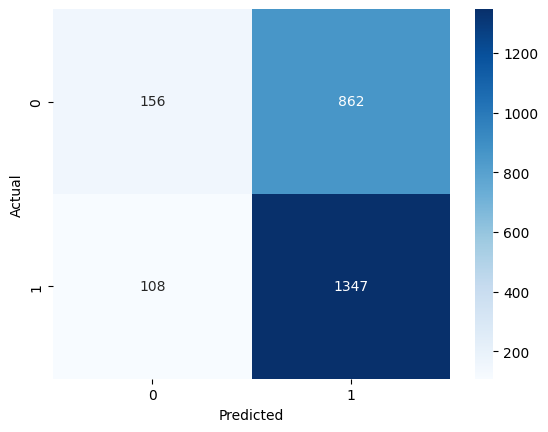

In [167]:
import seaborn as sns # you have to import seaborn because it has the heat map feature
import matplotlib.pyplot as plt # importing matplotlib

sns.heatmap(confusing_matrix, annot=True, cmap='Blues', fmt = "d", cbar=True) # creating a blue color scale heat map
plt.xlabel('Predicted') # labeling x axis
plt.ylabel('Actual') # labeling y axis
plt.show() # showing the heat map

In [168]:
train_accuracy = clf.score(x_test, y_test) # y_test is the actual data
print("Training accuracy:", train_accuracy) #print training accuracy

Training accuracy: 0.6077638495754145


In [169]:
precision = precision_score(y_test, vader_sentiment_pred) # calculate precision between actual data in test split and predicted y
print("Precision:", precision) #print precision score, precision is the accurarcy in predicting positive data True Positives / (True Positives + False Positives)

Precision: 0.6097781801720236


In [170]:
recall = recall_score(y_test, vader_sentiment_pred) # calculate recall score between actual data in test split and predicted y
print("Recall:", recall) # printing recall which the models ability to correctly predict positive occurances True Positives / (True Positives + False Negatives)

Recall: 0.9257731958762887


In [171]:
f1 = f1_score(y_test, vader_sentiment_pred) # calculate F1-score between actual data in test split and predicted y
print("F1-Score:", f1) # closer it is to 1 the better the model, it accounts for precision and recall and its an another metric that measures performance with positives  2 * (Precision * Recall) / (Precision + Recall)

F1-Score: 0.7352620087336245


**Statmodel**

In [172]:
x2 = comments_pos_neg # Explanatory variables parameter
y2 = comments_pos_neg['vader_sentiment_binary']  # Response variable target

from sklearn.model_selection import train_test_split # importing the train_test_split function from sklearn to split data because statmodels can't do ML

x2_train, x2_test, y2_train, y2_test = train_test_split( # creating training and test variables from x and y
    x2,
    y2,
    train_size = 0.4, # percent of data going to training
    random_state = 18, # This is set to control the shuffling applied to the data before spliting it, this makes it easier to compare the model when variables are added and removed
)

In [173]:
from statsmodels.formula.api import logit # importing the logit function from statsmodels so I can create a logistic regression
reg1 = "vader_sentiment_binary ~ contains_profanity + character_count + word_count + ups" # creating reg1 which will hold the regression

mat_model = logit(reg1, data=x2_train).fit() # training logistic regression on the training data
print(mat_model.summary()) # printing out the model summary after training

Optimization terminated successfully.
         Current function value: 0.664904
         Iterations 5
                             Logit Regression Results                             
Dep. Variable:     vader_sentiment_binary   No. Observations:                 1648
Model:                              Logit   Df Residuals:                     1643
Method:                               MLE   Df Model:                            4
Date:                    Fri, 19 Apr 2024   Pseudo R-squ.:                 0.01580
Time:                            01:08:56   Log-Likelihood:                -1095.8
converged:                           True   LL-Null:                       -1113.4
Covariance Type:                nonrobust   LLR p-value:                 4.254e-07
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.3131      0.072      4.343      0.0

In [174]:

expo_values = np.exp(mat_model.params)    # Function to exponentiatiate (raise to e) log(odds) to odds ratio
print(expo_values) # printing out the log-odds

Intercept             1.367614
contains_profanity    0.445480
character_count       0.997959
word_count            1.014940
ups                   0.999586
dtype: float64


**Time Series Graphs**

In [175]:
print(reddit_data1.dtypes) # checking the data type of date

comment                object
ups                     int64
downs                   int64
created               float64
date_time              object
date                   object
character_count         int64
word_count              int64
tokenized              object
polarity              float64
subjectivity          float64
textblob_sentiment     object
compound_score        float64
pos_score             float64
neg_score             float64
vader_sentiment        object
dtype: object


In [176]:
reddit_data1['date'] = pd.to_datetime(reddit_data1['date']) # changing to date to a date type

In [177]:

vader_month_averages = reddit_data1.groupby(pd.Grouper(key='date', freq='M'))['compound_score'].mean().reset_index() # Group by month and calculate the mean compound_score


vader_month_averages.columns = ['month', 'average_compound_score'] # renaming the columns

print(vader_month_averages)

       month  average_compound_score
0 2023-11-30                0.104402
1 2023-12-31                0.324283
2 2024-01-31                0.352584
3 2024-02-29               -0.305900
4 2024-03-31                0.306231


In [178]:

textblob_month_averages = reddit_data1.groupby(pd.Grouper(key='date', freq='M'))['polarity'].mean().reset_index() # Group by month and calculate the mean compound_score


textblob_month_averages.columns = ['month', 'average_compound_score'] # renaming the columns

print(textblob_month_averages)

       month  average_compound_score
0 2023-11-30                0.074271
1 2023-12-31                0.140139
2 2024-01-31                0.108041
3 2024-02-29               -0.180000
4 2024-03-31                0.096181


In [179]:
textblob_subjectivity_month_averages = reddit_data1.groupby(pd.Grouper(key='date', freq='M'))['subjectivity'].mean().reset_index() # Group by month and calculate the mean compound_score


textblob_subjectivity_month_averages.columns = ['month', 'average_compound_score'] # renaming the columns

print(textblob_subjectivity_month_averages)

       month  average_compound_score
0 2023-11-30                0.427964
1 2023-12-31                0.260556
2 2024-01-31                0.405529
3 2024-02-29                0.140000
4 2024-03-31                0.424847


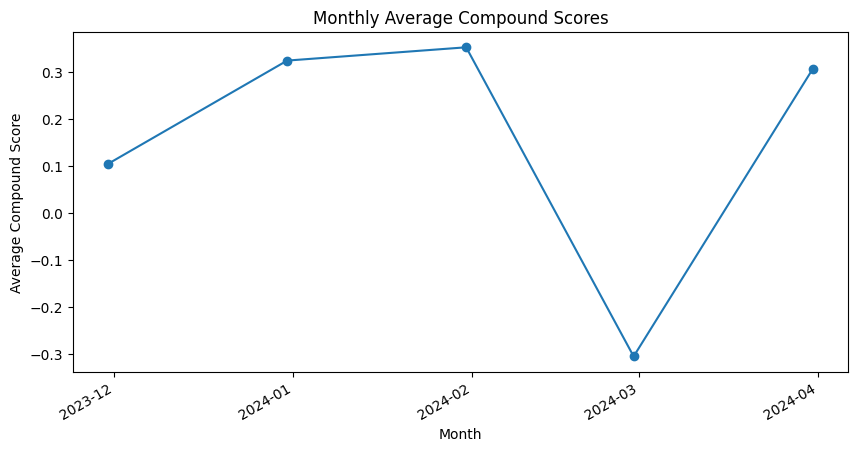

In [180]:

import matplotlib.dates as mdates # importing dates to make a time series plot

plt.figure(figsize=(10, 5))  # plot size


plt.plot(vader_month_averages['month'], vader_month_averages['average_compound_score'], marker='o', linestyle='-') # 'month' on the x-axis and 'average_compound_score' on the y-axis


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format the dates as 'Year-Month'
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Show a tick on the x-axis for each month


plt.xlabel('Month') # naming x axis
plt.ylabel('Average Compound Score') # naming y-axis
plt.title('Monthly Average Compound Scores') # naming title


plt.gcf().autofmt_xdate() # ensures the x-axis dates are properly displayed with the dates overlapping each other


plt.show() # showing the time series plot

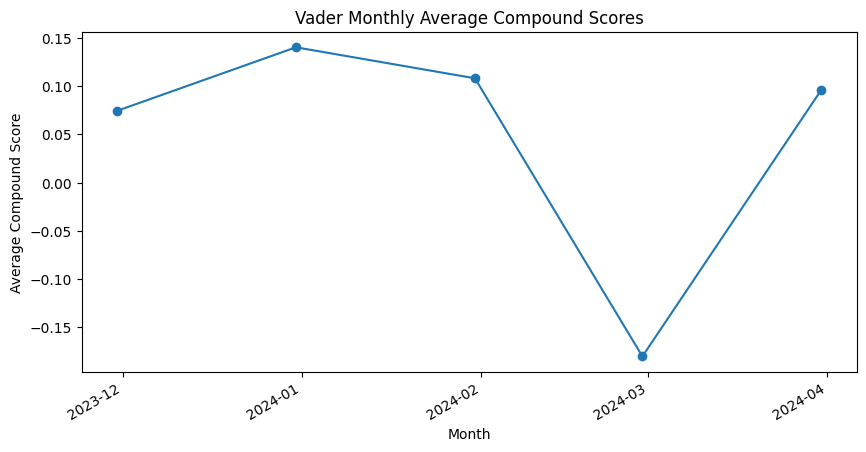

In [181]:

import matplotlib.dates as mdates # importing dates to make a time series plot

plt.figure(figsize=(10, 5))  # plot size


plt.plot(textblob_month_averages['month'], textblob_month_averages['average_compound_score'], marker='o', linestyle='-') # 'month' on the x-axis and 'average_compound_score' on the y-axis


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format the dates as 'Year-Month'
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Show a tick on the x-axis for each month


plt.xlabel('Month') # naming x axis
plt.ylabel('Average Compound Score') # naming y-axis
plt.title('Vader Monthly Average Compound Scores') # naming title


plt.gcf().autofmt_xdate() # ensures the x-axis dates are properly displayed with the dates overlapping each other
